___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [214]:
pip install tensorflow

In [215]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [217]:
data = pd.read_csv('Churn_Modelling.csv')

In [218]:
print(data.shape)

(10000, 14)


In [219]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [220]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [221]:
data= data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [222]:
# Print the shape of the data after dropping irrelevant features
print("Data shape after dropping columns:", data.shape)

Data shape after dropping columns: (10000, 11)


In [223]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [224]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

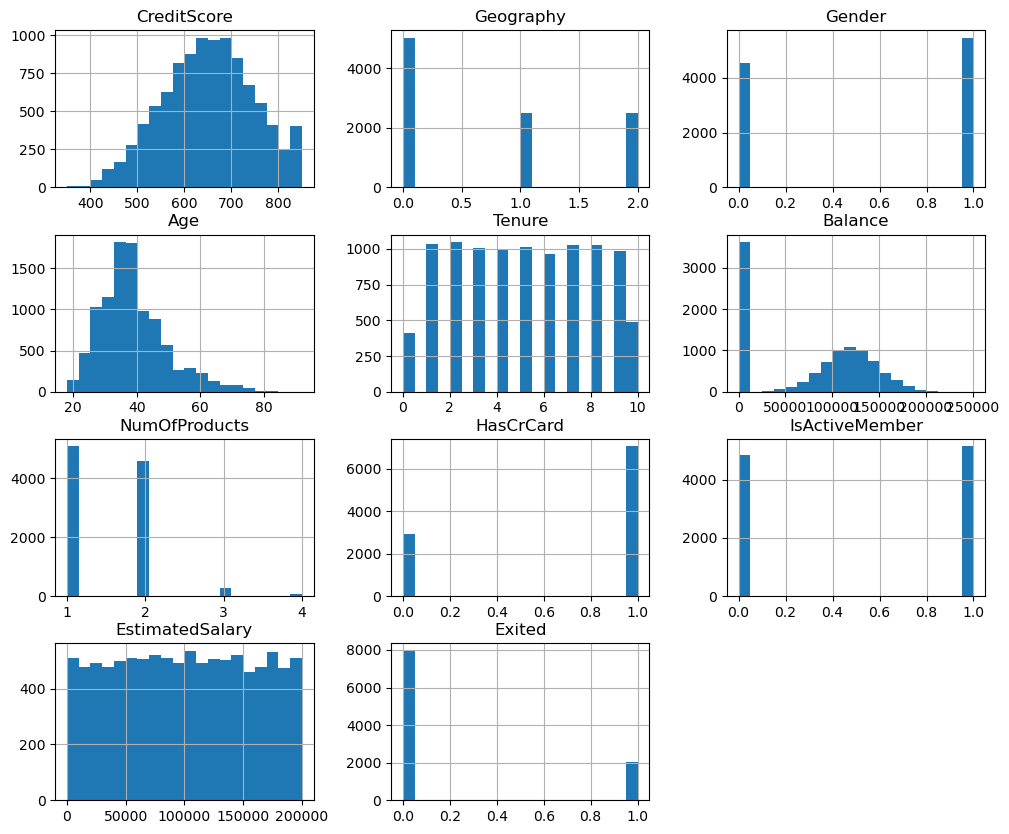

In [225]:
data.hist(bins=20, figsize=(12, 10))
plt.show()


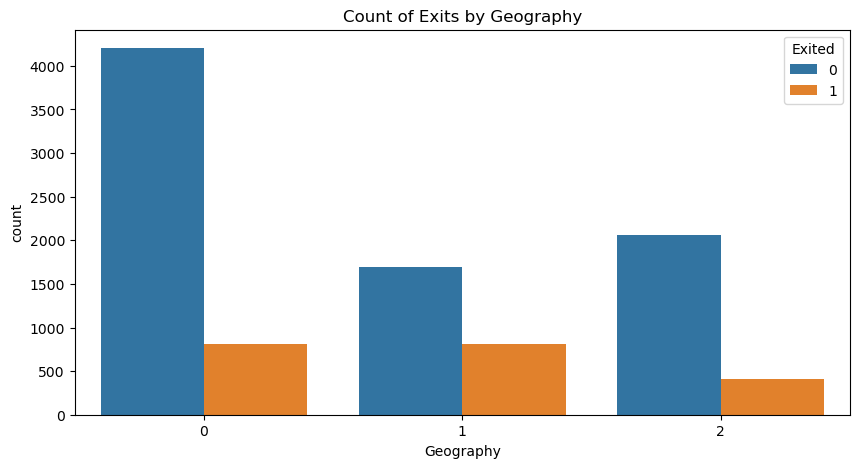

In [226]:
# Countplot for categorical variables (e.g., "Geography" and "Gender") to see the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Geography', hue='Exited')
plt.title('Count of Exits by Geography')
plt.show()

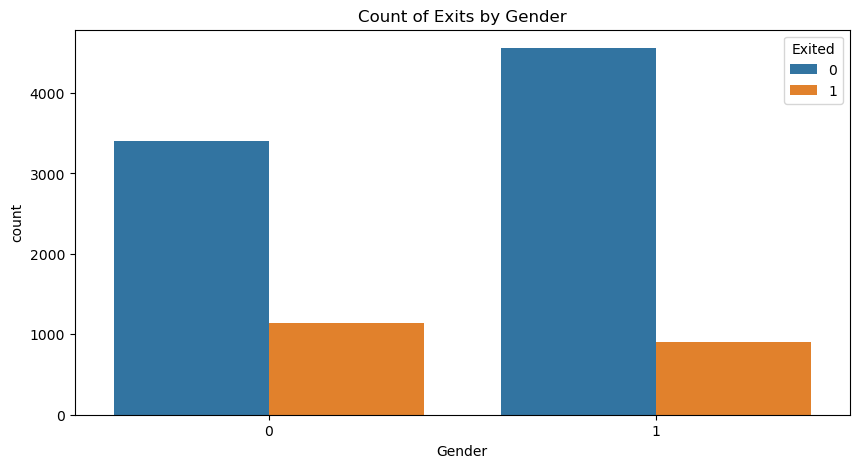

In [227]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Gender', hue='Exited')
plt.title('Count of Exits by Gender')
plt.show()

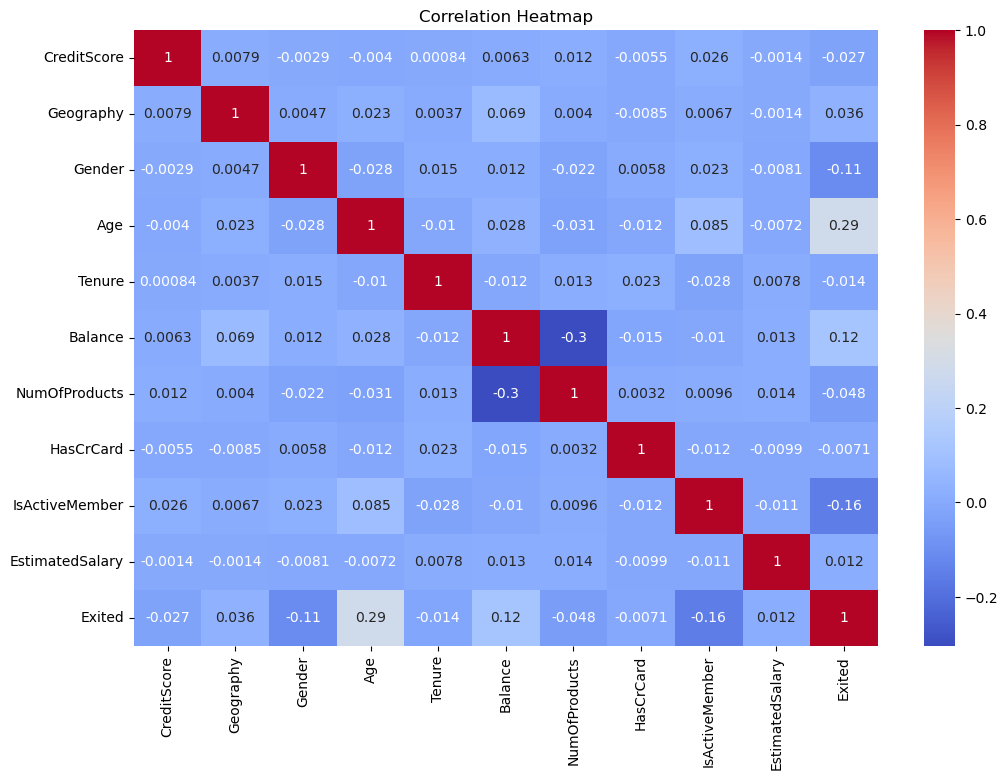

In [228]:
# Heatmap to visualize the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [229]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [230]:
# Print the shape of the data after converting categorical variables to dummy variables
print("Data shape after one-hot encoding:", data.shape)

Data shape after one-hot encoding: (10000, 12)


# Preprocessing of Data
- Train | Test Split, Scalling

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [232]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [233]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
# Feature scaling (normalize/standardize numerical variables)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [235]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
y_train shape: (8000,)
X_test shape: (2000, 11)
y_test shape: (2000,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [236]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [237]:
model = keras.Sequential([
    layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [238]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [239]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=0)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [240]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8650
Test loss: 0.33939000964164734
Test accuracy: 0.8650000095367432


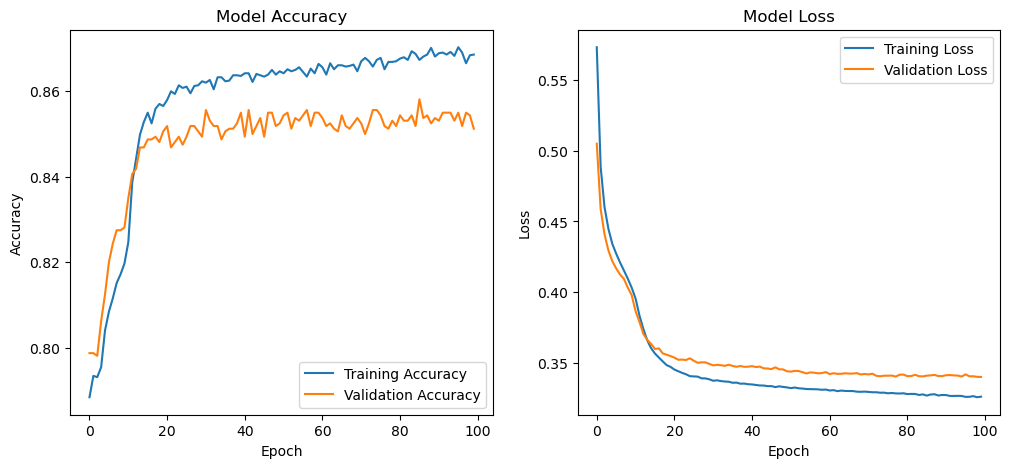

In [241]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [242]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

63/63 [==============================] - 0s 2ms/step


In [243]:
confusion = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1542   65]
 [ 205  188]]


In [244]:
classification_rep = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [245]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

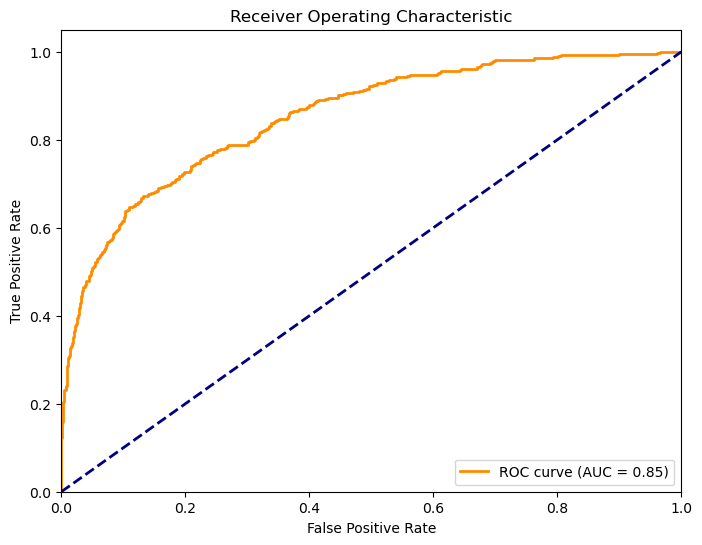

In [246]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [247]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [248]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [249]:
class_weights = {0: 1, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}


In [250]:
# Train the model with class weights
history2 = model2.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=0, class_weight=class_weights)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [251]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [252]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7885
Test loss: 0.4479123651981354
Test accuracy: 0.7885000109672546


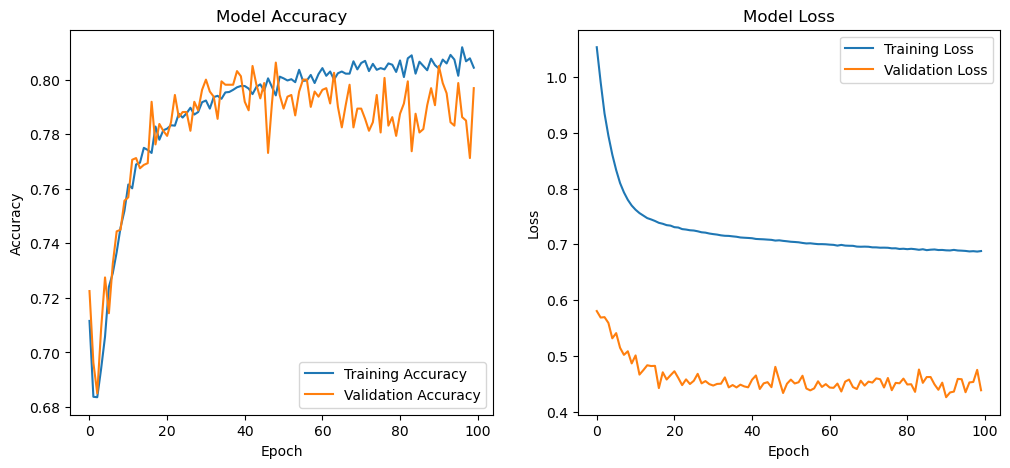

In [253]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [254]:
y_pred = model2.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

63/63 [==============================] - 0s 2ms/step


In [255]:
confusion = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1287  320]
 [ 103  290]]


In [256]:
classification_rep = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.74      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [257]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

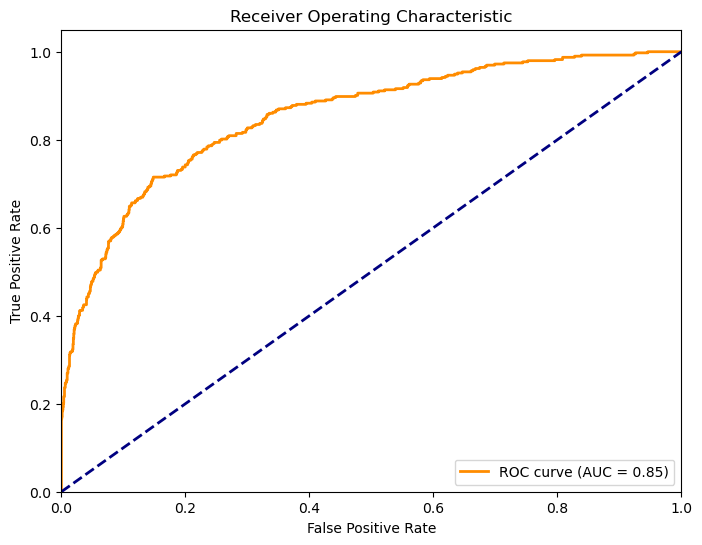

In [258]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [259]:
import tensorflow as tf

seed = 42

tf.random.set_seed(seed)
tf.keras.backend.clear_session()

In [260]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Add Dropout Layer

In [261]:
model_with_dropout = Sequential()

model_with_dropout.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model_with_dropout.add(Dropout(0.2))  # Add a dropout layer with a dropout rate (adjust as needed)
model_with_dropout.add(Dense(units=6, activation='relu'))
model_with_dropout.add(Dense(units=1, activation='sigmoid'))

In [262]:
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [263]:
history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=0)

In [264]:
loss_with_dropout, accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test)
print("Model with Dropout - Test Loss:", loss_with_dropout)
print("Model with Dropout - Test Accuracy:", accuracy_with_dropout)

63/63 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8640
Model with Dropout - Test Loss: 0.336384654045105
Model with Dropout - Test Accuracy: 0.8640000224113464


### Add Early Stop

#### Monitor the "val_loss" as metric

In [265]:
model_with_early_stop = Sequential()

model_with_early_stop.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model_with_early_stop.add(Dense(units=6, activation='relu'))
model_with_early_stop.add(Dense(units=1, activation='sigmoid'))

In [266]:
model_with_early_stop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [267]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [268]:
history_with_early_stop = model_with_early_stop.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping])


In [269]:
loss_with_early_stop, accuracy_with_early_stop = model_with_early_stop.evaluate(X_test, y_test)
print("Model with Early Stop - Test Loss:", loss_with_early_stop)
print("Model with Early Stop - Test Accuracy:", accuracy_with_early_stop)

63/63 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8560
Model with Early Stop - Test Loss: 0.3463507294654846
Model with Early Stop - Test Accuracy: 0.8560000061988831


#### Monitor the "val_recall" as metric

In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import recall_score

In [271]:
class CustomRecallCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Calculate recall on validation data
        y_pred_val = (self.model.predict(X_val) > 0.5).astype(int)
        val_recall = recall_score(y_val, y_pred_val)
        print(f'Val Recall: {val_recall:.4f}')

In [272]:
model_with_early_stop_recall = Sequential()

model_with_early_stop_recall.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model_with_early_stop_recall.add(Dense(units=6, activation='relu'))
model_with_early_stop_recall.add(Dense(units=1, activation='sigmoid'))


In [273]:
model_with_early_stop_recall.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [274]:
early_stopping_recall = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [275]:
history_with_early_stop_recall = model_with_early_stop_recall.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping_recall, CustomRecallCallback()])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [276]:
loss_with_early_stop_recall, accuracy_with_early_stop_recall = model_with_early_stop_recall.evaluate(X_test, y_test)
print("Model with Early Stop (Val Recall) - Test Loss:", loss_with_early_stop_recall)
print("Model with Early Stop (Val Recall) - Test Accuracy:", accuracy_with_early_stop_recall)

63/63 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8040
Model with Early Stop (Val Recall) - Test Loss: 0.49472078680992126
Model with Early Stop (Val Recall) - Test Accuracy: 0.8040000200271606


## Optuna

In [279]:
pip install optuna

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 435.7 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 388.9 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 430.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/78.7 kB ? eta -:--:--
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/409.6 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/409.6 kB 3.3 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/409.6 kB 3.3 MB/s eta 0:00:01
   ----------------- ---------------------- 174.1/409.6 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 235.5/409.6 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 276.5/409.6 kB 1.2 MB/s eta 

In [280]:
import optuna
import tensorflow as tf


In [281]:
def objective(trial):
    # Define the hyperparameter search space
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    num_units = trial.suggest_int("num_units", 32, 512)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)

    # Build the model with the sampled hyperparameters
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=num_units, activation='relu', input_dim=X_train.shape[1]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [287]:
    # Train the model and evaluate on a validation set
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]

    # Return the value to be optimized (e.g., 1 - validation accuracy)
    return 1 - val_accuracy

# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Run the optimization process
study.optimize(objective, n_trials=100)

# Retrieve the best hyperparameters
best_params = study.best_params

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [288]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8635
Test loss: 0.33971813321113586
Test accuracy: 0.8634999990463257


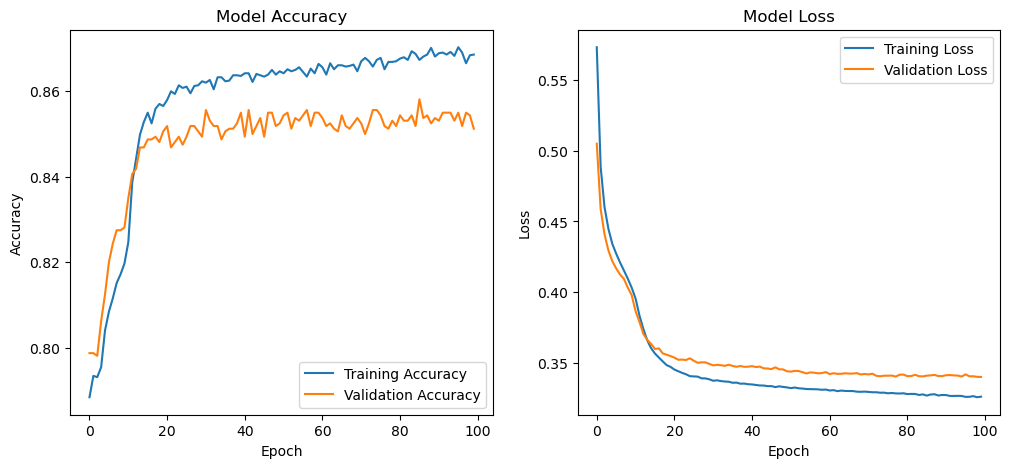

In [289]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [290]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

confusion = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(confusion)

classification_rep = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(classification_rep)


63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1537   70]
 [ 203  190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



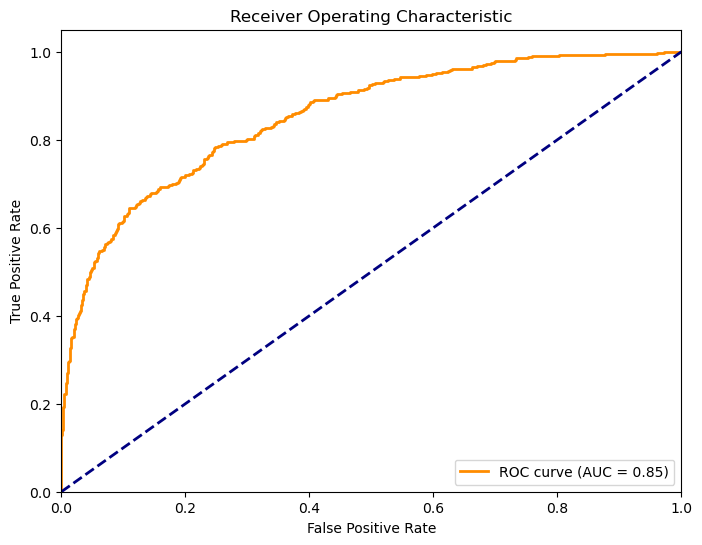

In [291]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Final Model and Model Deployment

In [304]:
import pickle
pickle.dump(transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

NameError: name 'transformer' is not defined

In [305]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

NameError: name 'grid_model' is not defined

In [306]:
average_precision_score(y_test, y_pred_proba)

NameError: name 'average_precision_score' is not defined

## Prediction

In [301]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Name: 0, dtype: object

In [302]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer


RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Name: 0, dtype: object

In [303]:
df["Exited"].iloc[0]


1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___